In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from tsfilt import (
    BoxFilter, GaussianFilter, BilateralFilter, IdenticalFilter, NonLocalMeanFilter
)

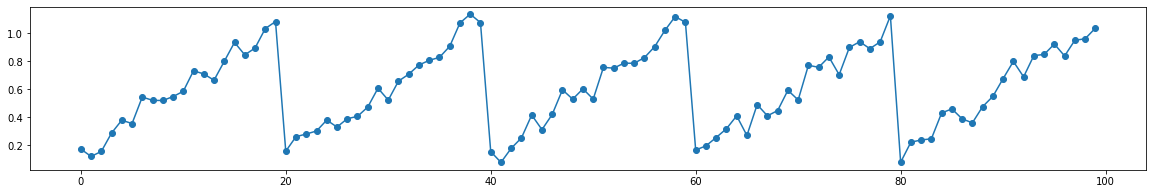

In [48]:
# create toy data
np.random.seed(123)
x = []
for i in range(5):
    tmp = np.arange(20, dtype=float)
    tmp += np.random.rand(tmp.size) * 5
    tmp /= tmp.size
    x.append(tmp)
x = np.hstack(x)
plt.figure(figsize=(20, 3))
plt.plot(x, "o-")

In [49]:
def display(x, x_filt, title):
    plt.figure(figsize=(20, 3))
    plt.plot(x, "o", label="original")
    plt.plot(x_filt, "-", label="filtered")
    plt.title(title)
    plt.legend()

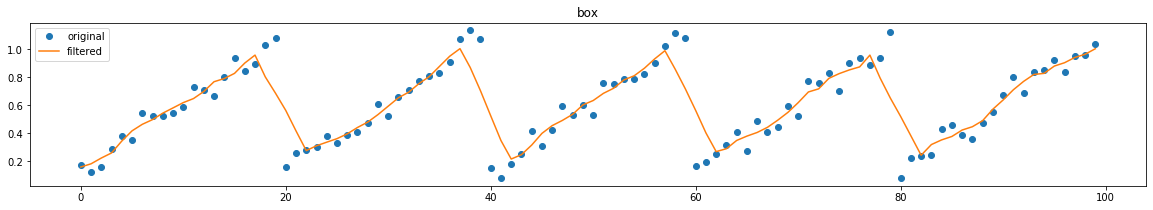

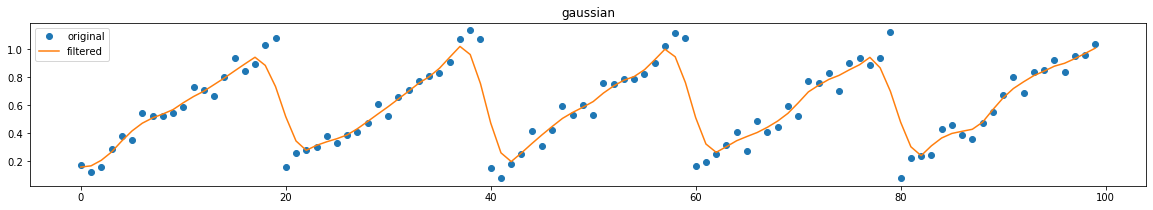

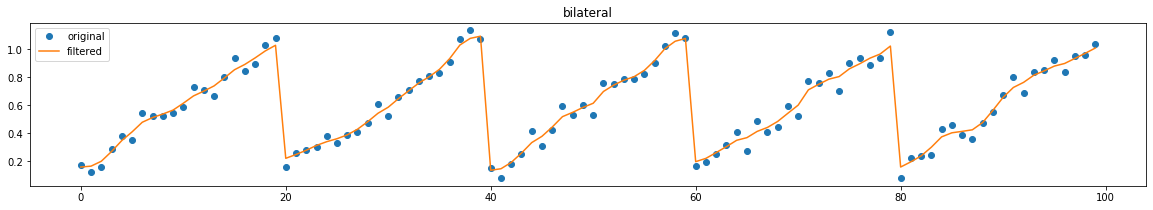

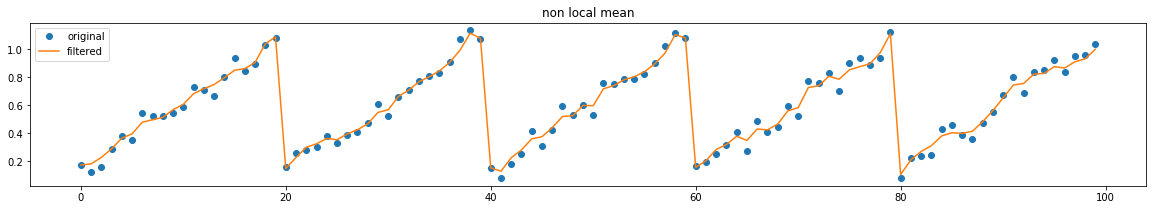

In [64]:
WIN_SIZE = 5
filters = {
    "box": BoxFilter(WIN_SIZE),
    "gaussian": GaussianFilter(WIN_SIZE, sigma_d=1.5),
    "bilateral": BilateralFilter(WIN_SIZE, sigma_d=1.5, sigma_i=.3),
    "non local mean": NonLocalMeanFilter(WIN_SIZE)
}

for filter_name, filt in filters.items():
    x_filt = filt.fit_transform(x)
    display(x, x_filt, filter_name)